# Homework 5: Regression with Gaussian Processes

------------------------------------------------------
*Machine Learning, Master in Big Data Analytics, 2017-2018*

*Pablo M. Olmos olmos@tsc.uc3m.es*

------------------------------------------------------

The aim of this homework is to solve a real data problem using the Gaussian Process implementation of GPy. The documentation of GPy is avaialable from the [SheffieldML github page](https://github.com/SheffieldML/GPy) or from [this page](http://gpy.readthedocs.org/en/latest/). 

The problem is the prediction of the house prices using the Housing Data Set from  <a href = https://archive.ics.uci.edu/ml/datasets/Housing>  UCI repository</a> that you can also download from scikit learn <a href = http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html> here</a>.


### 1. Loading and preparing the data (1 point)

* Download the dataset
* Divide the dataset into train (400) and test (106) datasets
* Check the range of prices in the train and test datasets

In [ ]:
Alper 

In [36]:
import numpy as np
import GPy
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import random

In [2]:
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.209, random_state=42)

In [4]:
print("Price range of train set ",np.amin(y_train),"-",np.amax(y_train))
print("Price range of test set ",np.amin(y_test),"-",np.amax(y_test))

Price range of train set  5.0 - 50.0
Price range of test set  5.0 - 50.0


### 2. Setting and optimizing the model

On the training data set:

a) Build a GP regression model based on a RBF kernel with ARD, in which each input dimension is weighted with a different lengthscale. This enhances interpretability. **2 points**

b) Fit the covariance function parameters and noise to the data. **1 point** 

c) Plot the parameters found for the covariance function. What variables are more important for the regression? **2 points**

On the test data set:

d) Plot and evaluate the prediction error using the opmitized parameters. **2 points**

2) Try to combine various covariance functions using the element-wise product or the sum of two kernels, and repeat steps b) and c). Comments the results. **2 points**

In this [link](http://nbviewer.jupyter.org/github/SheffieldML/notebook/blob/master/GPy/basic_kernels.ipynb) you can see how to define differnt kernels and operate with them.

In [5]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [6]:
# define kernel
ker = GPy.kern.RBF(13,ARD=True) + GPy.kern.White(13)
# create GP model
m = GPy.models.GPRegression(X_train,y_train,ker)
m.optimize(messages=True,max_f_eval = 1000)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s18  0003   1.976012e+04   2.017520e+07 
    01s21  0024   1.148736e+03   6.197830e+02 
    03s30  0068   1.044892e+03   1.212263e+02 
    10s46  0249   1.034319e+03   1.765476e-01 
    11s46  0275   1.033785e+03   1.022969e-02 
    19s59  0470   1.032480e+03   5.900414e-03 
    40s75  1002   1.031488e+03   5.886778e-02 
Runtime:     40s75
Optimization status: Maximum number of f evaluations reached



In [7]:
print(ker.parameter_names())
print(ker.rbf.variance.values)
print(ker.rbf.lengthscale.values)
print(ker.white.variance.values)

['rbf.variance', 'rbf.lengthscale', 'white.variance']
[344.02074953]
[8.24308442e+01 7.63854722e+02 2.55419467e+02 2.52338956e+00
 1.21604286e-01 2.73163105e+00 1.81417394e+02 2.55623793e+01
 3.61523257e+01 1.52863851e+02 3.22261824e+01 1.05469050e+03
 2.21453772e+01]
[2.11111186]


According to the **lengtscale** values (parameter tells you how will be the importance of the distance between two points in each of the different variables) most important variable is the 12th varaible ("**B**": 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town). Then others: "ZN",  "INDUS", "AGE", "TAX"...

In [71]:
#PREDICTION AND Mean Absolute Error

y_pred,_ = m.predict(X_test, full_cov=True)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.849988662763162


In [12]:
#2# SUM OF TWO DIFFERENT KERNELS

ker2=GPy.kern.ExpQuad(13,ARD=True) + GPy.kern.White(13)
ker_add = ker + ker2
# create GP model
m_add = GPy.models.GPRegression(X_train,y_train,ker_add)
m_add.optimize(messages=True,max_f_eval = 1000)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s09  0001   1.033545e+03   6.172143e+01 

 C:\Users\alper\Anaconda3\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


    00s19  0002   1.038527e+03   3.890121e+02 
    03s29  0040   1.027193e+03   3.729339e-01 
    09s62  0113   1.026766e+03   1.506317e-02 
Runtime:     09s62
Optimization status: Converged



In [59]:
print(ker_add.parameter_names())
print(ker_add.rbf.lengthscale.values)
print(ker_add.ExpQuad.lengthscale.values)

['rbf.variance', 'rbf.lengthscale', 'white.variance', 'ExpQuad.variance', 'ExpQuad.lengthscale', 'white_1.variance']
[7.50329807e+01 7.64204859e+02 2.56129368e+02 2.44155722e+00
 1.32229896e-01 2.67113612e+00 1.87268953e+02 2.26450263e+01
 4.19156843e+01 1.58718984e+02 2.68249046e+01 1.05527117e+03
 2.35225731e+01]
[5.01001194e+01 1.00000024e+00 1.00021947e+00 1.57122723e-07
 4.56888360e-01 6.16173474e+00 3.14327602e+00 1.11168884e+01
 1.00010114e+00 9.98386257e-01 9.99023491e-01 4.18488262e+00
 6.22929072e-01]


In [39]:
#Prediction of SUM OF 2 DIFFERENT KERNELS

y_pred_add,_ = m_add.predict(X_test, full_cov=True)
mae = mean_absolute_error(y_test, y_pred_add)
print("Mean Absolute Error for sum of 2 kernels:", mae)

Mean Absolute Error for sum of 2 kernels: 1.8440284024714944


<IPython.core.display.Javascript object>


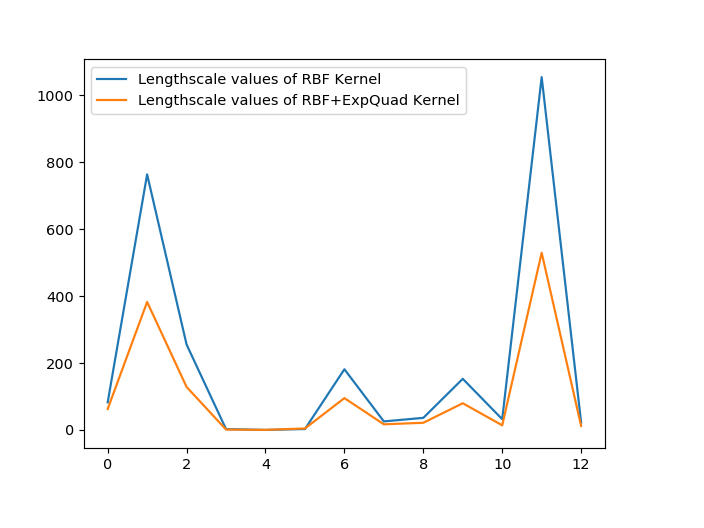

In [70]:
#Plots with 2 kernels
%matplotlib notebook 
p = ker.rbf.lengthscale.values
p_add = (ker_add.rbf.lengthscale.values+ker_add.ExpQuad.lengthscale.values)/2
plt.figure()
plt.plot(p, label="Lengthscale values of RBF Kernel")
plt.plot(p_add, label="Lengthscale values of RBF+ExpQuad Kernel")
plt.legend()
plt.show()

**I used sum of 2 different kernels (RBF + ExpQuad). Comparing the MAE scores, they perform almost same.**
 
**According to the plot, order of the variables according to the importance does not change with these 2 kernels.**

### Sparse GP implementation (optional)

Try to implement an sparse version of the GP regressor, optimized to find a set of **inducing points** that the GP relies on to do the prediction. Measure the test error prediction for 20, 40, and 100 inducing points.

In [26]:
m_sparse = GPy.models.SparseGPRegression(X_train,y_train)
print(m_sparse)
m_sparse.optimize('bfgs')


Name : sparse_gp
Objective : 121349.95030893994
Number of Parameters : 133
Number of Optimization Parameters : 133
Updates : True
Parameters:
  sparse_gp.               |     value  |  constraints  |  priors
  inducing_inputs          |  (10, 13)  |               |        
  rbf.variance             |       1.0  |      +ve      |        
  rbf.lengthscale          |       1.0  |      +ve      |        
  Gaussian_noise.variance  |       1.0  |      +ve      |        


In [40]:
#MAE
y_pred_sparse,_ = m_sparse.predict(X_test, full_cov=True)
mae = mean_absolute_error(y_test, y_pred_sparse)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 21.28773584905337


In [28]:
#Randomly chosen 20 inducing points

ins=np.random.choice(400,20)
m_sparse_20 = GPy.models.SparseGPRegression(X_train[ins,:],y_train[ins,:])
print(m_sparse_20)
#m_sparse.inducing_inputs.fix()
m_sparse.optimize('bfgs')


Name : sparse_gp
Objective : 4938.502068232217
Number of Parameters : 133
Number of Optimization Parameters : 133
Updates : True
Parameters:
  sparse_gp.               |     value  |  constraints  |  priors
  inducing_inputs          |  (10, 13)  |               |        
  rbf.variance             |       1.0  |      +ve      |        
  rbf.lengthscale          |       1.0  |      +ve      |        
  Gaussian_noise.variance  |       1.0  |      +ve      |        


In [41]:
#MAE 20
y_pred_sparse_20,_ = m_sparse_20.predict(X_test, full_cov=True)
mae = mean_absolute_error(y_test, y_pred_sparse_20)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 21.287713800936114


In [30]:
#Randomly chosen 40 inducing points

ins=np.random.choice(400,40)
m_sparse_40 = GPy.models.SparseGPRegression(X_train[ins,:],y_train[ins,:])
print(m_sparse_40)
#m_sparse.inducing_inputs.fix()
m_sparse.optimize('bfgs')


Name : sparse_gp
Objective : 9141.082777236019
Number of Parameters : 133
Number of Optimization Parameters : 133
Updates : True
Parameters:
  sparse_gp.               |     value  |  constraints  |  priors
  inducing_inputs          |  (10, 13)  |               |        
  rbf.variance             |       1.0  |      +ve      |        
  rbf.lengthscale          |       1.0  |      +ve      |        
  Gaussian_noise.variance  |       1.0  |      +ve      |        


In [42]:
#MAE 40
y_pred_sparse_40,_ = m_sparse_40.predict(X_test, full_cov=True)
mae = mean_absolute_error(y_test, y_pred_sparse_40)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 21.07303358052602


In [33]:
#Randomly chosen 100 inducing points

ins=np.random.choice(400,100)
m_sparse_100 = GPy.models.SparseGPRegression(X_train[ins,:],y_train[ins,:])
print(m_sparse_100)
#m_sparse.inducing_inputs.fix()
m_sparse_100.optimize('bfgs')


Name : sparse_gp
Objective : 29096.19775717365
Number of Parameters : 133
Number of Optimization Parameters : 133
Updates : True
Parameters:
  sparse_gp.               |     value  |  constraints  |  priors
  inducing_inputs          |  (10, 13)  |               |        
  rbf.variance             |       1.0  |      +ve      |        
  rbf.lengthscale          |       1.0  |      +ve      |        
  Gaussian_noise.variance  |       1.0  |      +ve      |        


In [43]:
#MAE 100
y_pred_sparse_100,_ = m_sparse_100.predict(X_test, full_cov=True)
mae = mean_absolute_error(y_test, y_pred_sparse_100)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 3.4009817938314737


**Each time I increase the *inducing points*, obtained mae score decreased. Training with more data points improved the model performance**